In [8]:
import pandas as pd
import numpy as np
import random
import os

def process_survey_data():
    """
    Process two datasets to create balanced survey data (50/50 split).
    """
    
    # Set random seed for reproducibility
    random.seed(42)
    np.random.seed(42)
    
    print("Loading datasets...")
    base_llm_df = pd.read_csv('base_llm_llama_three_basic_0823_temperature_0.8.csv')
    cluster_diff_df = pd.read_csv('tot_llama_op_persona_personahub_cluster_diff_case_step3_3persona_no_arg_schemes.csv')
    
    print(f"Base LLM dataset: {len(base_llm_df)} rows")
    print(f"Cluster Diff dataset: {len(cluster_diff_df)} rows")
    
    # Group base LLM data (has input column)
    base_llm_grouped = []
    for post_id, group in base_llm_df.groupby('post_id'):
        opinion = group['input'].iloc[0]
        args = group.sort_values('gen_counter')['gen_counter'].head(3).tolist()
        if len(args) >= 3:
            base_llm_grouped.append({
                'post_id': post_id,
                'opinion': opinion,
                'args': args
            })
    
    # Group cluster diff data (no input column)
    cluster_diff_grouped = []
    for post_id, group in cluster_diff_df.groupby('post_id'):
        args = group.sort_values('gen_counter')['gen_counter'].head(3).tolist()
        if len(args) >= 3:
            cluster_diff_grouped.append({
                'post_id': post_id,
                'args': args
            })
    
    # Find common post_ids
    base_post_ids = set(item['post_id'] for item in base_llm_grouped)
    cluster_post_ids = set(item['post_id'] for item in cluster_diff_grouped)
    common_post_ids = list(base_post_ids.intersection(cluster_post_ids))
    
    print(f"Common post_ids: {len(common_post_ids)}")
    
    # Create balanced assignment (50/50 split)
    half_size = len(common_post_ids) // 2
    random.shuffle(common_post_ids)
    base_to_set_a = set(common_post_ids[:half_size])
    
    # Create lookup dictionaries
    base_dict = {item['post_id']: item for item in base_llm_grouped if item['post_id'] in common_post_ids}
    cluster_dict = {item['post_id']: item for item in cluster_diff_grouped if item['post_id'] in common_post_ids}
    
    # Generate survey data
    survey_data = []
    assignment_log = []
    
    print("Creating balanced survey data...")
    
    for post_id in common_post_ids[:half_size*2]:
        base_item = base_dict[post_id]
        cluster_item = cluster_dict[post_id]
        
        if post_id in base_to_set_a:
            # Base LLM -> Set A
            set_a_source = 'base_llm'
            set_a_args = base_item['args']
            set_b_args = cluster_item['args']
        else:
            # Cluster Diff -> Set A
            set_a_source = 'cluster_diff'
            set_a_args = cluster_item['args']
            set_b_args = base_item['args']
        
        survey_data.append({
            'post_id': post_id,
            'opinion': base_item['opinion'],
            'set_a_arg1': set_a_args[0],
            'set_a_arg2': set_a_args[1],
            'set_a_arg3': set_a_args[2],
            'set_b_arg1': set_b_args[0],
            'set_b_arg2': set_b_args[1],
            'set_b_arg3': set_b_args[2]
        })
        
        assignment_log.append({
            'post_id': post_id,
            'set_a_source': set_a_source,
            'set_b_source': 'cluster_diff' if set_a_source == 'base_llm' else 'base_llm'
        })
    
    # Convert to DataFrames and shuffle
    survey_df = pd.DataFrame(survey_data)
    assignment_df = pd.DataFrame(assignment_log)
    survey_df = survey_df.sample(frac=1, random_state=42).reset_index(drop=True)
    
    # Create data directory and save files
    survey_df.to_csv('../survey_data.csv', index=False, encoding='utf-8')
    assignment_df.to_csv('../survey_data_assignment_log.csv', index=False, encoding='utf-8')
    
    print(f"✅ Created {len(survey_df)} survey items (balanced 50/50)")
    print(f"Assignment: {assignment_df['set_a_source'].value_counts().to_dict()}")
    print("Files saved:")
    print("  📊 ../survey_data.csv")
    print("  📋 ../survey_data_assignment_log.csv")
    
    return survey_df, assignment_df

if __name__ == "__main__":
    process_survey_data()
    print("\n🎉 Processing complete! Run: python server.py")

Loading datasets...
Base LLM dataset: 2541 rows
Cluster Diff dataset: 2541 rows
Common post_ids: 847
Creating balanced survey data...
✅ Created 846 survey items (balanced 50/50)
Assignment: {'base_llm': 423, 'cluster_diff': 423}
Files saved:
  📊 ../survey_data.csv
  📋 ../survey_data_assignment_log.csv

🎉 Processing complete! Run: python server.py


Starting data distribution analysis and sampling

Loading data...
Base LLM: 2,541 rows
Cluster Diff: 2,541 rows
Filtering out texts longer than 2000 (input)...
After filtering - Base LLM: 1,662 rows
After filtering - Cluster Diff: 2,541 rows

Input length statistics:
count    1662.000000
mean     1215.787004
std       390.665779
min       152.000000
25%       892.000000
50%      1172.500000
75%      1525.000000
max      1999.000000
Name: input_length, dtype: float64

Base LLM gen_counter length stats:
count    1662.00000
mean     1061.09627
std       271.76620
min         3.00000
25%       886.00000
50%      1021.00000
75%      1193.00000
max      2260.00000
Name: gen_counter_length, dtype: float64

Cluster Diff gen_counter length stats:
count    2541.000000
mean     2322.736718
std       327.438036
min      1407.000000
25%      2096.000000
50%      2317.000000
75%      2526.000000
max      3665.000000
Name: gen_counter_length, dtype: float64

Base LLM unique post_ids: 554
Cluster Diff

findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Fo

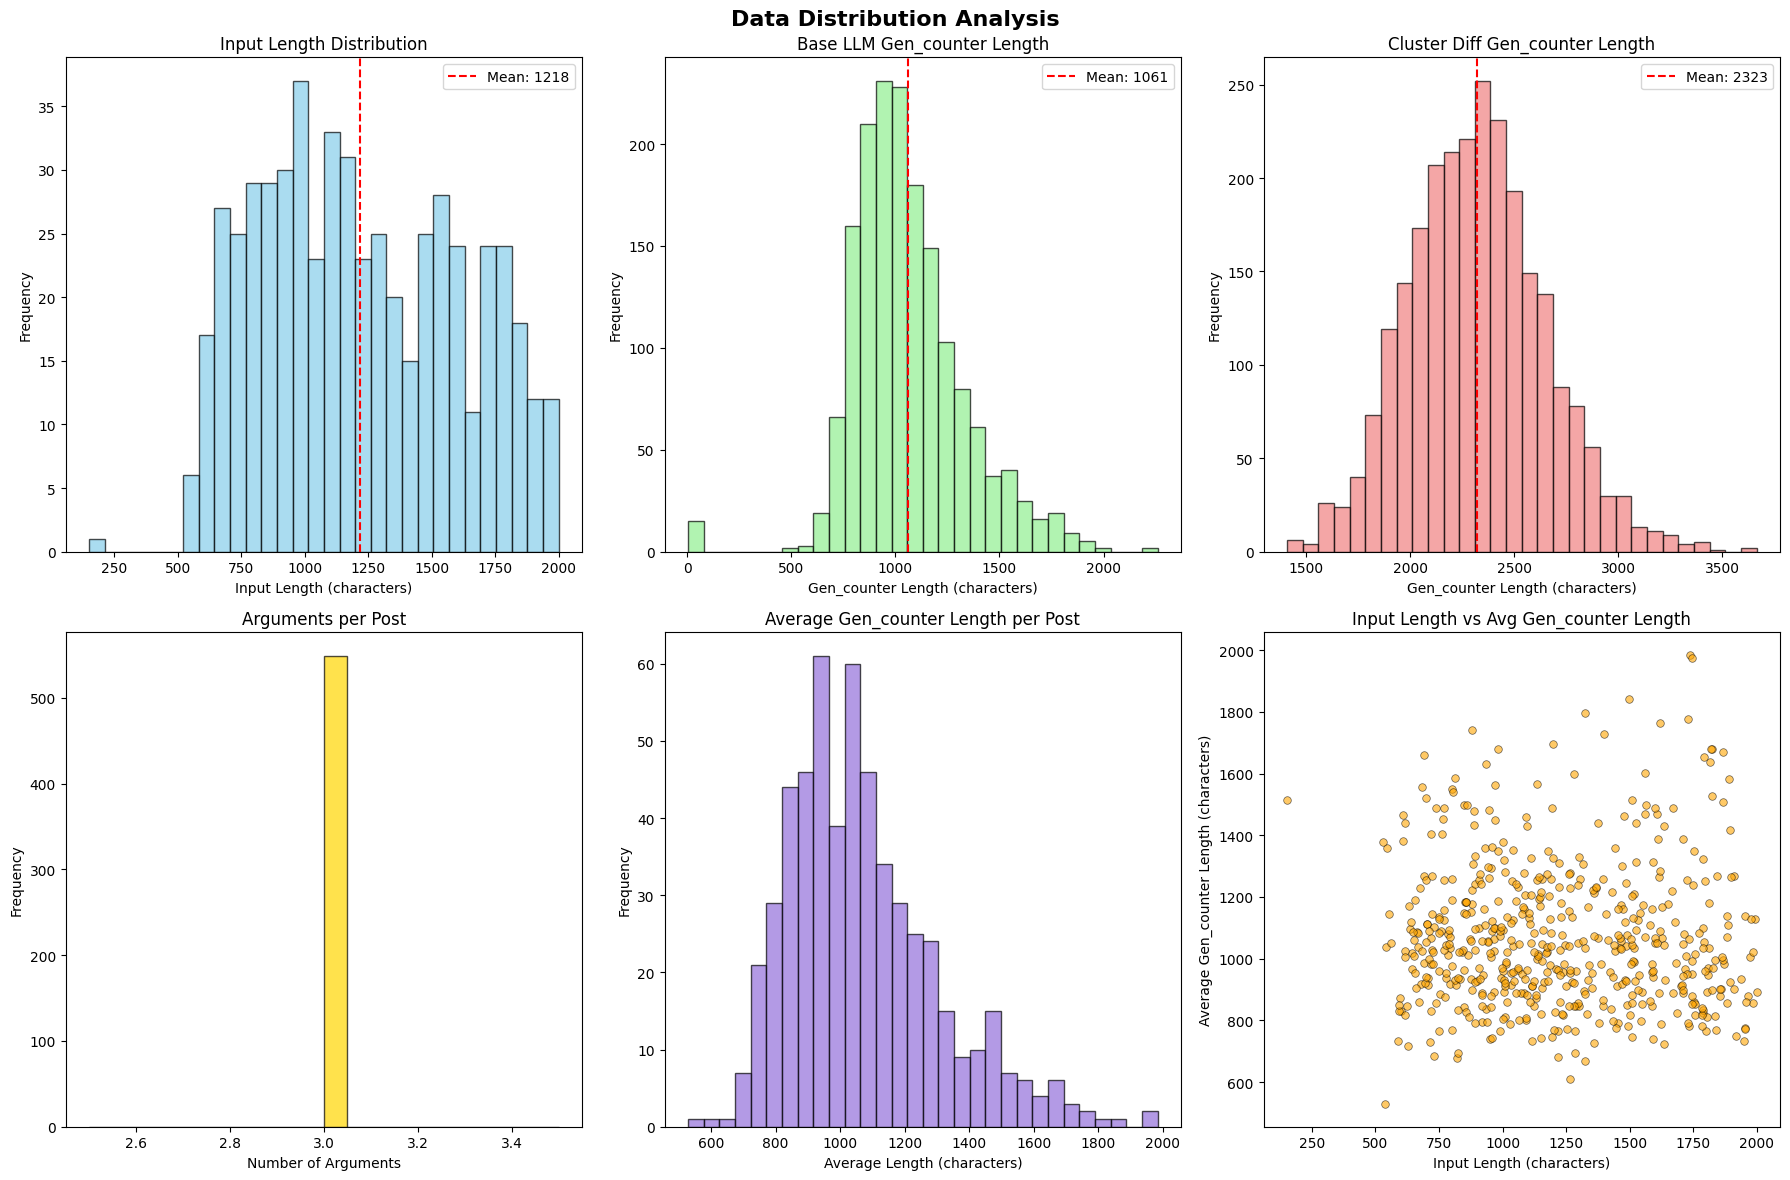

Performing stratified sampling for 50 samples...
Final sample: 50 items selected

Results saved:
  sampled_analysis_data.csv - Sampled analysis data
  selected_post_ids.csv - Selected post_id list


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import random

# Font settings for better compatibility
plt.rcParams['font.family'] = ['DejaVu Sans', 'Arial Unicode MS', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

def analyze_data_distribution():
    """
    Analyze and visualize dataset distribution
    """
    print("Loading data...")
    
    # Load data
    base_llm_df = pd.read_csv('base_llm_llama_three_basic_0823_temperature_0.8.csv')
    cluster_diff_df = pd.read_csv('tot_llama_op_persona_personahub_cluster_diff_case_step3_3persona_no_arg_schemes.csv')
    
    print(f"Base LLM: {len(base_llm_df):,} rows")
    print(f"Cluster Diff: {len(cluster_diff_df):,} rows")
    
    # Calculate text lengths
    base_llm_df['input_length'] = base_llm_df['input'].astype(str).str.len()
    base_llm_df['gen_counter_length'] = base_llm_df['gen_counter'].astype(str).str.len()
    cluster_diff_df['gen_counter_length'] = cluster_diff_df['gen_counter'].astype(str).str.len()
    
    # Filter out excessively long texts
    INPUT_MAX_LENGTH = 2000  # Maximum input length
    # GEN_COUNTER_MAX_LENGTH = 1000  # Maximum gen_counter length
    
    print(f"Filtering out texts longer than {INPUT_MAX_LENGTH} (input)...") # and {GEN_COUNTER_MAX_LENGTH} (gen_counter) characters...")
    
    # Filter base_llm_df
    base_llm_df = base_llm_df[
        (base_llm_df['input_length'] <= INPUT_MAX_LENGTH) 
        # & (base_llm_df['gen_counter_length'] <= GEN_COUNTER_MAX_LENGTH)
    ].copy()
    
    # Filter cluster_diff_df
    # cluster_diff_df = cluster_diff_df[
    #     cluster_diff_df['gen_counter_length'] <= GEN_COUNTER_MAX_LENGTH
    # ].copy()
    
    print(f"After filtering - Base LLM: {len(base_llm_df):,} rows")
    print(f"After filtering - Cluster Diff: {len(cluster_diff_df):,} rows\n")
    
    # 1. Input length distribution analysis
    print("Input length statistics:")
    print(base_llm_df['input_length'].describe())
    print()
    # 2. Gen_counter length distribution analysis
    print("Base LLM gen_counter length stats:")
    print(base_llm_df['gen_counter_length'].describe())
    print("\nCluster Diff gen_counter length stats:")
    print(cluster_diff_df['gen_counter_length'].describe())
    print()
    
    # 3. Group by post_id and analyze
    base_grouped = base_llm_df.groupby('post_id').agg({
        'input': 'first',
        'input_length': 'first',
        'gen_counter': 'count',
        'gen_counter_length': ['mean', 'std', 'min', 'max']
    }).reset_index()
    
    base_grouped.columns = ['post_id', 'input', 'input_length', 'arg_count', 
                           'avg_gen_length', 'std_gen_length', 'min_gen_length', 'max_gen_length']
    
    cluster_grouped = cluster_diff_df.groupby('post_id').agg({
        'gen_counter': 'count',
        'gen_counter_length': ['mean', 'std', 'min', 'max']
    }).reset_index()
    
    cluster_grouped.columns = ['post_id', 'arg_count', 'avg_gen_length', 'std_gen_length', 
                              'min_gen_length', 'max_gen_length']
    
    print(f"Base LLM unique post_ids: {len(base_grouped):,}")
    print(f"Cluster Diff unique post_ids: {len(cluster_grouped):,}")
    
    # Find common post_ids
    common_post_ids = set(base_grouped['post_id']).intersection(set(cluster_grouped['post_id']))
    print(f"Common post_ids: {len(common_post_ids):,}")
    
    # Filter for posts with at least 3 arguments
    base_common = base_grouped[base_grouped['post_id'].isin(common_post_ids)].copy()
    cluster_common = cluster_grouped[cluster_grouped['post_id'].isin(common_post_ids)].copy()
    
    base_valid = base_common[base_common['arg_count'] >= 3]
    cluster_valid = cluster_common[cluster_common['arg_count'] >= 3]
    
    valid_post_ids = set(base_valid['post_id']).intersection(set(cluster_valid['post_id']))
    print(f"Valid post_ids (>=3 args): {len(valid_post_ids):,}\n")
    
    analysis_data = base_common[base_common['post_id'].isin(valid_post_ids)].copy()
    
    return analysis_data, base_llm_df, cluster_diff_df

def create_visualizations(analysis_data, base_llm_df, cluster_diff_df):
    """
    Create data distribution visualizations
    """
    print("Creating visualizations...")
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Data Distribution Analysis', fontsize=16, fontweight='bold')
    
    # 1. Input length distribution
    axes[0, 0].hist(analysis_data['input_length'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('Input Length Distribution')
    axes[0, 0].set_xlabel('Input Length (characters)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].axvline(analysis_data['input_length'].mean(), color='red', linestyle='--', 
                       label=f'Mean: {analysis_data["input_length"].mean():.0f}')
    axes[0, 0].legend()
    
    # 2. Base LLM gen_counter length distribution
    axes[0, 1].hist(base_llm_df['gen_counter_length'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[0, 1].set_title('Base LLM Gen_counter Length')
    axes[0, 1].set_xlabel('Gen_counter Length (characters)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].axvline(base_llm_df['gen_counter_length'].mean(), color='red', linestyle='--',
                       label=f'Mean: {base_llm_df["gen_counter_length"].mean():.0f}')
    axes[0, 1].legend()
    
    # 3. Cluster Diff gen_counter length distribution
    axes[0, 2].hist(cluster_diff_df['gen_counter_length'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[0, 2].set_title('Cluster Diff Gen_counter Length')
    axes[0, 2].set_xlabel('Gen_counter Length (characters)')
    axes[0, 2].set_ylabel('Frequency')
    axes[0, 2].axvline(cluster_diff_df['gen_counter_length'].mean(), color='red', linestyle='--',
                       label=f'Mean: {cluster_diff_df["gen_counter_length"].mean():.0f}')
    axes[0, 2].legend()
    
    # 4. Arguments per post distribution
    axes[1, 0].hist(analysis_data['arg_count'], bins=20, alpha=0.7, color='gold', edgecolor='black')
    axes[1, 0].set_title('Arguments per Post')
    axes[1, 0].set_xlabel('Number of Arguments')
    axes[1, 0].set_ylabel('Frequency')
    
    # 5. Average gen_counter length distribution
    axes[1, 1].hist(analysis_data['avg_gen_length'], bins=30, alpha=0.7, color='mediumpurple', edgecolor='black')
    axes[1, 1].set_title('Average Gen_counter Length per Post')
    axes[1, 1].set_xlabel('Average Length (characters)')
    axes[1, 1].set_ylabel('Frequency')
    
    # 6. Input vs average gen_counter length scatter plot
    axes[1, 2].scatter(analysis_data['input_length'], analysis_data['avg_gen_length'], 
                      alpha=0.6, s=30, c='orange', edgecolors='black', linewidth=0.5)
    axes[1, 2].set_title('Input Length vs Avg Gen_counter Length')
    axes[1, 2].set_xlabel('Input Length (characters)')
    axes[1, 2].set_ylabel('Average Gen_counter Length (characters)')
    
    plt.tight_layout()
    plt.show()
    
    return fig

def stratified_sampling(analysis_data, n_samples=80, random_state=42):
    """
    Stratified sampling for balanced sample selection
    """
    print(f"Performing stratified sampling for {n_samples} samples...")
    
    # Create quartiles based on input length
    analysis_data['input_length_quartile'] = pd.qcut(analysis_data['input_length'], 
                                                    q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
    
    # Create quartiles based on average gen_counter length
    analysis_data['avg_gen_length_quartile'] = pd.qcut(analysis_data['avg_gen_length'], 
                                                      q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
    
    # Create strata combinations
    analysis_data['strata'] = analysis_data['input_length_quartile'].astype(str) + '_' + \
                             analysis_data['avg_gen_length_quartile'].astype(str)
    
    # Sample from each stratum proportionally
    sampled_data = []
    strata_counts = analysis_data['strata'].value_counts().sort_index()
    
    for stratum in strata_counts.index:
        stratum_data = analysis_data[analysis_data['strata'] == stratum]
        n_stratum = len(stratum_data)
        
        # Calculate proportional sample size
        sample_size = max(1, int(n_samples * n_stratum / len(analysis_data)))
        sample_size = min(sample_size, n_stratum)
        
        # Sample from stratum
        stratum_sample = stratum_data.sample(n=sample_size, random_state=random_state)
        sampled_data.append(stratum_sample)
    
    # Combine samples
    final_sample = pd.concat(sampled_data, ignore_index=True)
    
    # Adjust to target sample size
    if len(final_sample) > n_samples:
        final_sample = final_sample.sample(n=n_samples, random_state=random_state)
    elif len(final_sample) < n_samples:
        remaining = n_samples - len(final_sample)
        excluded_data = analysis_data[~analysis_data['post_id'].isin(final_sample['post_id'])]
        additional_sample = excluded_data.sample(n=min(remaining, len(excluded_data)), 
                                               random_state=random_state)
        final_sample = pd.concat([final_sample, additional_sample], ignore_index=True)
    
    print(f"Final sample: {len(final_sample)} items selected")
    
    return final_sample

def main():
    """
    Execute complete analysis process
    """
    print("Starting data distribution analysis and sampling\n")
    
    # 1. Analyze data
    analysis_data, base_llm_df, cluster_diff_df = analyze_data_distribution()
    
    # 2. Create visualizations
    fig = create_visualizations(analysis_data, base_llm_df, cluster_diff_df)
    
    # 3. Perform sampling
    sampled_data = stratified_sampling(analysis_data, n_samples=50)
    
    # 4. Get selected post_ids
    selected_post_ids = sampled_data['post_id'].tolist()
    
    # 5. Save results
    sampled_data.to_csv('sampled_analysis_data.csv', index=False, encoding='utf-8')
    pd.DataFrame({'post_id': selected_post_ids}).to_csv('selected_post_ids.csv', index=False)
    
    print("\nResults saved:")
    print("  sampled_analysis_data.csv - Sampled analysis data")
    print("  selected_post_ids.csv - Selected post_id list")
    
    return selected_post_ids, sampled_data, analysis_data

# Execute
if __name__ == "__main__":
    selected_post_ids, sampled_data, analysis_data = main()

In [6]:
# import pandas as pd
# import numpy as np
# import random
# import os
# import re
# import html
# import unicodedata

# def clean_markdown_text(text):
#     """
#     Remove markdown formatting, HTML entities, and return clean text
    
#     Args:
#         text: Input text with potential markdown and HTML entities
#     Returns:
#         Clean text without markdown formatting or HTML entities
#     """
#     if not text or pd.isna(text):
#         return text
    
#     text = str(text)
    
#     # First decode HTML entities (multiple passes for nested entities)
#     prev_text = ""
#     while prev_text != text:
#         prev_text = text
#         text = html.unescape(text)  # &#x200B; -> actual character, &amp; -> &, etc.
    
#     # Handle common HTML entities that might remain
#     html_entities = {
#         '&nbsp;': ' ',
#         '&lt;': '<',
#         '&gt;': '>',
#         '&quot;': '"',
#         '&apos;': "'",
#         '&#39;': "'",
#         '&hellip;': '...',
#         '&mdash;': '—',
#         '&ndash;': '–',
#         '&ldquo;': '"',
#         '&rdquo;': '"',
#         '&lsquo;': "'",
#         '&rsquo;': "'",
#     }
    
#     for entity, replacement in html_entities.items():
#         text = text.replace(entity, replacement)
    
#     # Remove zero-width characters and other invisible unicode characters
#     text = re.sub(r'[\u200B-\u200D\uFEFF]', '', text)  # Zero width space, joiner, etc.
#     text = re.sub(r'[\u00A0]', ' ', text)  # Non-breaking space -> regular space
#     text = re.sub(r'[\u2060]', '', text)  # Word joiner
#     text = re.sub(r'[\u180E]', '', text)  # Mongolian vowel separator
    
#     # Remove or normalize other problematic unicode characters
#     text = re.sub(r'[\u2028\u2029]', '\n', text)  # Line/paragraph separators -> newline
    
#     # Remove HTML tags first (including self-closing tags and with attributes)
#     text = re.sub(r'<[^>]*?/?>', '', text)
    
#     # Remove code blocks first (triple backticks)
#     text = re.sub(r'```[\s\S]*?```', '', text)
#     text = re.sub(r'~~~[\s\S]*?~~~', '', text)
    
#     # Remove inline code
#     text = re.sub(r'`([^`\n]*)`', r'\1', text)
    
#     # Remove bold/italic markers (be more precise)
#     text = re.sub(r'\*\*\*(.+?)\*\*\*', r'\1', text)  # Bold+italic
#     text = re.sub(r'___(.+?)___', r'\1', text)         # Bold+italic
#     text = re.sub(r'\*\*(.+?)\*\*', r'\1', text)      # Bold
#     text = re.sub(r'__(.+?)__', r'\1', text)          # Bold
#     text = re.sub(r'\*([^*\n]+?)\*', r'\1', text)     # Italic
#     text = re.sub(r'_([^_\n]+?)_', r'\1', text)       # Italic
    
#     # Remove strikethrough
#     text = re.sub(r'~~(.+?)~~', r'\1', text)
    
#     # Remove headers (# ## ### etc.)
#     text = re.sub(r'^#{1,6}\s+(.*)$', r'\1', text, flags=re.MULTILINE)
    
#     # Handle lists more carefully
#     text = re.sub(r'^[\s]*[\*\-\+]\s+', '• ', text, flags=re.MULTILINE)  # Bullet lists
#     text = re.sub(r'^[\s]*\d+\.\s+', '• ', text, flags=re.MULTILINE)     # Numbered lists
    
#     # Remove links but keep text: [text](url) -> text
#     text = re.sub(r'\[([^\]]*?)\]\([^)]*?\)', r'\1', text)
    
#     # Remove reference-style links: [text][ref] -> text
#     text = re.sub(r'\[([^\]]*?)\]\[[^\]]*?\]', r'\1', text)
    
#     # Remove standalone URLs (but keep the domain for context if useful)
#     text = re.sub(r'https?://[^\s<>"\']+', '[링크]', text)
    
#     # Remove email addresses
#     text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '[이메일]', text)
    
#     # Handle blockquotes
#     text = re.sub(r'^[\s]*>[\s]*', '', text, flags=re.MULTILINE)
    
#     # Remove horizontal rules
#     text = re.sub(r'^[\s]*[-*_]{3,}[\s]*$', '', text, flags=re.MULTILINE)
    
#     # Remove table formatting
#     text = re.sub(r'\|.*?\|', '', text)  # Remove table rows
#     text = re.sub(r'^[\s]*:?-+:?[\s]*$', '', text, flags=re.MULTILINE)  # Remove table separators
    
#     # Clean up whitespace more carefully
#     text = re.sub(r'\n{3,}', '\n\n', text)  # Multiple newlines -> double newline
#     text = re.sub(r'[ \t]+', ' ', text)     # Multiple spaces/tabs -> single space
#     text = re.sub(r'\n\s+\n', '\n\n', text) # Remove whitespace-only lines
    
#     # Remove any remaining special characters but keep Korean characters and common punctuation
#     # Keep: letters, digits, whitespace, Korean, Chinese, Japanese, common punctuation
#     text = re.sub(r'[^\w\s\.,!?;:()\-\'\"•\n가-힣ㄱ-ㅎㅏ-ㅣ一-龯ひらがな-ゔカタカナ-ヺ]', '', text)
    
#     # Final cleanup
#     text = text.strip()
    
#     # Remove empty lines at the beginning and end
#     text = re.sub(r'^\n+', '', text)
#     text = re.sub(r'\n+$', '', text)
    
#     return text

# def validate_cleaned_text(text, original_text):
#     """
#     Validate that the cleaned text maintains essential content
    
#     Args:
#         text: Cleaned text
#         original_text: Original text
#     Returns:
#         bool: True if cleaning seems successful
#     """
#     if not text or len(text) < 10:  # Too short after cleaning
#         return False
    
#     # Check if we lost too much content (more than 70% reduction might be suspicious)
#     if len(text) < len(original_text) * 0.3:
#         print(f"Warning: Text reduced from {len(original_text)} to {len(text)} characters")
    
#     # Check for obvious markdown remnants
#     markdown_remnants = ['**', '__', '```', '##', '](', '[', '&gt;', '&lt;']
#     for remnant in markdown_remnants:
#         if remnant in text:
#             print(f"Warning: Markdown remnant found: {remnant}")
#             return False
    
#     return True

# def process_sampled_survey_data(selected_post_ids):
#     """
#     Create balanced survey data using sampled post_ids with clean text (markdown removed).
    
#     Args:
#         selected_post_ids (list): List of selected post_ids from previous sampling
#     """
    
#     # Set random seed for reproducibility
#     random.seed(42)
#     np.random.seed(42)
    
#     print("Creating Survey Data from sampled data...")
#     print(f"Selected post_ids count: {len(selected_post_ids)}")
    
#     # Load datasets
#     print("\nLoading datasets...")
#     base_llm_df = pd.read_csv('base_llm_llama_three_strategy_temperature_0.8.csv')
#     cluster_diff_df = pd.read_csv('250808_v2_tot_llama_personahub_op_personahub_cluster_diff_case_explore_perspective_50d_200.csv')
    
#     print(f"Base LLM dataset: {len(base_llm_df):,} rows")
#     print(f"Cluster Diff dataset: {len(cluster_diff_df):,} rows")
    
#     # Filter by selected post_ids
#     base_llm_filtered = base_llm_df[base_llm_df['post_id'].isin(selected_post_ids)]
#     cluster_diff_filtered = cluster_diff_df[cluster_diff_df['post_id'].isin(selected_post_ids)]
    
#     print(f"Filtered Base LLM: {len(base_llm_filtered):,} rows")
#     print(f"Filtered Cluster Diff: {len(cluster_diff_filtered):,} rows")
    
#     # Clean markdown from text columns with validation
#     print("\nCleaning markdown formatting...")
    
#     # Clean base LLM data
#     base_llm_filtered = base_llm_filtered.copy()
    
#     # Clean input column
#     cleaned_inputs = []
#     for idx, original in enumerate(base_llm_filtered['input']):
#         cleaned = clean_markdown_text(original)
#         if validate_cleaned_text(cleaned, str(original)):
#             cleaned_inputs.append(cleaned)
#         else:
#             print(f"Warning: Validation failed for input at index {idx}")
#             cleaned_inputs.append(cleaned)  # Still use it but warn
#     base_llm_filtered['input'] = cleaned_inputs
    
#     # Clean gen_counter column
#     cleaned_counters = []
#     for idx, original in enumerate(base_llm_filtered['gen_counter']):
#         cleaned = clean_markdown_text(original)
#         if validate_cleaned_text(cleaned, str(original)):
#             cleaned_counters.append(cleaned)
#         else:
#             print(f"Warning: Validation failed for gen_counter at index {idx}")
#             cleaned_counters.append(cleaned)
#     base_llm_filtered['gen_counter'] = cleaned_counters
    
#     # Clean cluster diff data
#     cluster_diff_filtered = cluster_diff_filtered.copy()
#     cleaned_cluster_counters = []
#     for idx, original in enumerate(cluster_diff_filtered['gen_counter']):
#         cleaned = clean_markdown_text(original)
#         if validate_cleaned_text(cleaned, str(original)):
#             cleaned_cluster_counters.append(cleaned)
#         else:
#             print(f"Warning: Validation failed for cluster diff gen_counter at index {idx}")
#             cleaned_cluster_counters.append(cleaned)
#     cluster_diff_filtered['gen_counter'] = cleaned_cluster_counters
    
#     print("Markdown cleaning completed.")
    
#     # Group base LLM data (has input column)
#     print("\nGrouping Base LLM data...")
#     base_llm_grouped = []
#     for post_id, group in base_llm_filtered.groupby('post_id'):
#         if post_id not in selected_post_ids:
#             continue
            
#         opinion = group['input'].iloc[0]
#         # Sort by gen_counter and select top 3
#         sorted_group = group.sort_values('gen_counter')
#         args = sorted_group['gen_counter'].head(3).tolist()
        
#         if len(args) >= 3:
#             base_llm_grouped.append({
#                 'post_id': post_id,
#                 'opinion': opinion,
#                 'args': args,
#                 'full_args': sorted_group['gen_counter'].tolist()
#             })
    
#     # Group cluster diff data (no input column)
#     print("Grouping Cluster Diff data...")
#     cluster_diff_grouped = []
#     for post_id, group in cluster_diff_filtered.groupby('post_id'):
#         if post_id not in selected_post_ids:
#             continue
            
#         # Sort by gen_counter and select top 3
#         sorted_group = group.sort_values('gen_counter')
#         args = sorted_group['gen_counter'].head(3).tolist()
        
#         if len(args) >= 3:
#             cluster_diff_grouped.append({
#                 'post_id': post_id,
#                 'args': args,
#                 'full_args': sorted_group['gen_counter'].tolist()
#             })
    
#     print(f"Grouped Base LLM items: {len(base_llm_grouped)}")
#     print(f"Grouped Cluster Diff items: {len(cluster_diff_grouped)}")
    
#     # Find valid post_ids (both datasets have this post_id with >=3 args)
#     base_post_ids = set(item['post_id'] for item in base_llm_grouped)
#     cluster_post_ids = set(item['post_id'] for item in cluster_diff_grouped)
#     valid_post_ids = list(base_post_ids.intersection(cluster_post_ids))
    
#     print(f"\nValid common post_ids: {len(valid_post_ids)}")
    
#     if len(valid_post_ids) == 0:
#         print("No valid common post_ids found!")
#         return None, None
    
#     # Create random assignment (randomly assign base_llm or cluster_diff to Set A for each post_id)
#     print("\nGenerating completely random assignment...")
    
#     base_to_set_a = set()
#     for post_id in valid_post_ids:
#         # 50% probability to assign base_llm to Set A for each post_id
#         if random.random() < 0.5:
#             base_to_set_a.add(post_id)
    
#     base_count = len(base_to_set_a)
#     cluster_count = len(valid_post_ids) - base_count
#     print(f"Base LLM assigned to Set A: {base_count} items")
#     print(f"Cluster Diff assigned to Set A: {cluster_count} items")
    
#     # Show distribution ratio
#     base_ratio = (base_count / len(valid_post_ids)) * 100
#     cluster_ratio = (cluster_count / len(valid_post_ids)) * 100
#     print(f"Random distribution: Base LLM {base_ratio:.1f}% | Cluster Diff {cluster_ratio:.1f}%")
    
#     # Create lookup dictionaries
#     base_dict = {item['post_id']: item for item in base_llm_grouped if item['post_id'] in valid_post_ids}
#     cluster_dict = {item['post_id']: item for item in cluster_diff_grouped if item['post_id'] in valid_post_ids}
    
#     # Generate survey data
#     print("\nGenerating survey data...")
#     survey_data = []
#     assignment_log = []
    
#     for post_id in valid_post_ids:
#         base_item = base_dict[post_id]
#         cluster_item = cluster_dict[post_id]
        
#         if post_id in base_to_set_a:
#             # Base LLM -> Set A
#             set_a_source = 'base_llm'
#             set_a_args = base_item['args'].copy()
#             set_b_args = cluster_item['args'].copy()
#         else:
#             # Cluster Diff -> Set A
#             set_a_source = 'cluster_diff'
#             set_a_args = cluster_item['args'].copy()
#             set_b_args = base_item['args'].copy()

#         survey_data.append({
#             'post_id': post_id,
#             'opinion': base_item['opinion'],
#             'set_a_arg1': set_a_args[0],
#             'set_a_arg2': set_a_args[1],
#             'set_a_arg3': set_a_args[2],
#             'set_b_arg1': set_b_args[0],
#             'set_b_arg2': set_b_args[1],
#             'set_b_arg3': set_b_args[2]
#         })
        
#         assignment_log.append({
#             'post_id': post_id,
#             'set_a_source': set_a_source,
#             'set_b_source': 'cluster_diff' if set_a_source == 'base_llm' else 'base_llm',
#             'opinion_length': len(str(base_item['opinion'])),
#             'base_llm_args_count': len(base_item['full_args']),
#             'cluster_diff_args_count': len(cluster_item['full_args']),
#             'set_a_avg_length': np.mean([len(str(arg)) for arg in set_a_args]),
#             'set_b_avg_length': np.mean([len(str(arg)) for arg in set_b_args])
#         })
    
#     # Convert to DataFrames and shuffle
#     print("Shuffling data...")
#     survey_df = pd.DataFrame(survey_data)
#     assignment_df = pd.DataFrame(assignment_log)
    
#     # Reproducible shuffling
#     survey_df = survey_df.sample(frac=1, random_state=42).reset_index(drop=True)
    
#     # Result statistics
#     print(f"\nGeneration completed!")
#     print(f"Total {len(survey_df)} survey items generated")
#     print(f"Assignment distribution: {assignment_df['set_a_source'].value_counts().to_dict()}")
    
#     # Detailed statistics
#     print(f"\nDetailed statistics:")
#     print(f"Average opinion length: {assignment_df['opinion_length'].mean():.1f} characters")
#     print(f"Average Set A argument length: {assignment_df['set_a_avg_length'].mean():.1f} characters") 
#     print(f"Average Set B argument length: {assignment_df['set_b_avg_length'].mean():.1f} characters")
#     print(f"Average Base LLM arguments count: {assignment_df['base_llm_args_count'].mean():.1f}")
#     print(f"Average Cluster Diff arguments count: {assignment_df['cluster_diff_args_count'].mean():.1f}")
    
#     print(f"\nRandomization applied:")
#     print(f"✅ Post ID order shuffled")
#     print(f"✅ Base LLM ↔ Cluster Diff completely randomized")
#     print(f"✅ Final survey items order shuffled")
#     print(f"✅ Markdown formatting and HTML entities removed")
#     print(f"✅ Text validation applied")
    
#     return survey_df, assignment_df

# def save_survey_data(survey_df, assignment_df, output_dir='../'):
#     """
#     Save survey data to files
    
#     Args:
#         survey_df: Survey data DataFrame
#         assignment_df: Assignment log DataFrame
#         output_dir: Output directory
#     """
    
#     if survey_df is None or assignment_df is None:
#         print("No data to save.")
#         return
    
#     print(f"\nSaving files... (output directory: {output_dir})")
    
#     # Create directory if needed
#     os.makedirs(output_dir, exist_ok=True)
    
#     # Include sample size in filename
#     sample_size = len(survey_df)
#     survey_filename = f'{output_dir}survey_data_cleaned.csv'
#     assignment_filename = f'{output_dir}survey_data_assignment_log_cleaned_{sample_size}.csv'
    
#     # Save files with UTF-8 encoding
#     survey_df.to_csv(survey_filename, index=False, encoding='utf-8-sig')
#     assignment_df.to_csv(assignment_filename, index=False, encoding='utf-8-sig')
    
#     print("Files saved successfully:")
#     print(f"  📊 {survey_filename}")
#     print(f"  📋 {assignment_filename}")
    
#     # Preview sample data with length info
#     print(f"\nSurvey data preview (top 3 items):")
#     for idx in range(min(3, len(survey_df))):
#         row = survey_df.iloc[idx]
#         print(f"\nItem {idx+1} (Post ID: {row['post_id']}):")
#         print(f"Opinion ({len(row['opinion'])} chars): {row['opinion'][:100]}...")
#         print(f"Set A Arg1 ({len(row['set_a_arg1'])} chars): {row['set_a_arg1'][:80]}...")
#         print(f"Set B Arg1 ({len(row['set_b_arg1'])} chars): {row['set_b_arg1'][:80]}...")
    
#     return survey_filename, assignment_filename

# def analyze_survey_balance(assignment_df):
#     """
#     Analyze balance of generated survey data
    
#     Args:
#         assignment_df: Assignment log DataFrame
#     """
    
#     if assignment_df is None:
#         return
        
#     print(f"\nSurvey data balance analysis:")
#     print("="*50)
    
#     # Source distribution
#     source_dist = assignment_df['set_a_source'].value_counts()
#     print(f"Set A Source distribution:")
#     for source, count in source_dist.items():
#         percentage = (count / len(assignment_df)) * 100
#         print(f"  {source}: {count} items ({percentage:.1f}%)")
    
#     # Length-based distribution analysis
#     print(f"\nOpinion length distribution:")
#     opinion_quartiles = pd.qcut(assignment_df['opinion_length'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
#     opinion_source_crosstab = pd.crosstab(opinion_quartiles, assignment_df['set_a_source'])
#     print(opinion_source_crosstab)
    
#     # Arguments length balance
#     print(f"\nArguments length balance:")
#     print(f"Set A vs Set B average length difference: {(assignment_df['set_a_avg_length'] - assignment_df['set_b_avg_length']).mean():.2f} characters")
    
#     # Overall balance score (closer to 0 is more balanced)
#     balance_score = abs(source_dist['base_llm'] - source_dist['cluster_diff']) / len(assignment_df)
#     print(f"\n⚖️ Balance score: {balance_score:.3f} (closer to 0 is more balanced)")
    
#     if balance_score < 0.1:
#         print("✅ Very well balanced distribution!")
#     elif balance_score < 0.2:
#         print("👍 Well balanced distribution.")
#     else:
#         print("⚠️ Some imbalance detected. Consider resampling.")

# def create_sampled_survey_data(selected_post_ids):
#     """
#     Main function to execute the complete process
    
#     Args:
#         selected_post_ids: List of selected post_ids from previous sampling
#     """
    
#     print("🚀 Starting Survey Data creation from sampled data (Enhanced cleaning)\n")
    
#     # 1. Generate survey data
#     survey_df, assignment_df = process_sampled_survey_data(selected_post_ids)
    
#     if survey_df is not None:
#         # 2. Balance analysis
#         analyze_survey_balance(assignment_df)
        
#         # 3. Save files
#         survey_filename, assignment_filename = save_survey_data(survey_df, assignment_df)
        
#         print(f"\n🎉 Process completed! Total {len(survey_df)} balanced survey items generated.")
#         print(f"✨ All markdown formatting and HTML entities have been thoroughly cleaned.")
#         print(f"🔍 Text validation ensures content quality is maintained.")
#         print(f"\nNext step: Run 'python server.py' to start the survey!")
        
#         return survey_df, assignment_df, survey_filename, assignment_filename
#     else:
#         print("❌ Survey data generation failed.")
#         return None, None, None, None

# # Example execution (assuming selected_post_ids is defined from previous cell)
# survey_df, assignment_df, survey_file, assignment_file = create_sampled_survey_data(selected_post_ids)

In [10]:
import pandas as pd
import numpy as np
import random
import os
import re
import html
import unicodedata

def clean_markdown_text(text):
    """
    Remove markdown formatting, HTML entities, and return clean text
    
    Args:
        text: Input text with potential markdown and HTML entities
    Returns:
        Clean text without markdown formatting or HTML entities
    """
    if not text or pd.isna(text):
        return text
    
    text = str(text)
    
    # First handle raw escape sequences that might appear as literal text
    text = text.replace('\\x200B', '')  # Remove literal \x200B strings
    text = text.replace('\\u200B', '')  # Remove literal \u200B strings
    text = text.replace('\\x200C', '')  # Remove literal \x200C strings
    text = text.replace('\\u200C', '')  # Remove literal \u200C strings
    text = text.replace('\\x200D', '')  # Remove literal \x200D strings
    text = text.replace('\\u200D', '')  # Remove literal \u200D strings
    text = text.replace('\\xFEFF', '')  # Remove literal \xFEFF strings
    text = text.replace('\\uFEFF', '')  # Remove literal \uFEFF strings
    
    # Decode HTML entities (multiple passes for nested entities)
    prev_text = ""
    while prev_text != text:
        prev_text = text
        text = html.unescape(text)  # &#x200B; -> actual character, &amp; -> &, etc.
    
    # Handle common HTML entities that might remain
    html_entities = {
        '&nbsp;': ' ',
        '&lt;': '<',
        '&gt;': '>',
        '&quot;': '"',
        '&apos;': "'",
        '&#39;': "'",
        '&hellip;': '...',
        '&mdash;': '—',
        '&ndash;': '–',
        '&ldquo;': '"',
        '&rdquo;': '"',
        '&lsquo;': "'",
        '&rsquo;': "'",
        # Zero-width space entities
        '&#8203;': '',  # Zero width space
        '&#x200B;': '', # Zero width space hex
        '&#8204;': '',  # Zero width non-joiner
        '&#x200C;': '', # Zero width non-joiner hex
        '&#8205;': '',  # Zero width joiner
        '&#x200D;': '', # Zero width joiner hex
        '&#65279;': '', # Byte order mark
        '&#xFEFF;': '', # Byte order mark hex
    }
    
    for entity, replacement in html_entities.items():
        text = text.replace(entity, replacement)
    
    # Remove actual unicode zero-width characters (after HTML decoding)
    zero_width_chars = [
        '\u200B',  # Zero width space
        '\u200C',  # Zero width non-joiner
        '\u200D',  # Zero width joiner  
        '\uFEFF',  # Byte order mark
        '\u2060',  # Word joiner
        '\u180E',  # Mongolian vowel separator
        '\u061C',  # Arabic letter mark
        '\u17B4',  # Khmer vowel inherent AQ
        '\u17B5',  # Khmer vowel inherent AA
    ]
    
    for char in zero_width_chars:
        text = text.replace(char, '')
    
    # Additional regex-based cleanup for any remaining invisible characters
    text = re.sub(r'[\u200B-\u200D\uFEFF\u2060\u180E\u061C]', '', text)
    text = re.sub(r'[\u00A0]', ' ', text)  # Non-breaking space -> regular space
    
    # Remove or normalize other problematic unicode characters
    text = re.sub(r'[\u2028\u2029]', '\n', text)  # Line/paragraph separators -> newline
    
    # Remove HTML tags first (including self-closing tags and with attributes)
    text = re.sub(r'<[^>]*?/?>', '', text)
    
    # Remove code blocks first (triple backticks)
    text = re.sub(r'```[\s\S]*?```', '', text)
    text = re.sub(r'~~~[\s\S]*?~~~', '', text)
    
    # Remove inline code
    text = re.sub(r'`([^`\n]*)`', r'\1', text)
    
    # Remove bold/italic markers (be more precise)
    text = re.sub(r'\*\*\*(.+?)\*\*\*', r'\1', text)  # Bold+italic
    text = re.sub(r'___(.+?)___', r'\1', text)         # Bold+italic
    text = re.sub(r'\*\*(.+?)\*\*', r'\1', text)      # Bold
    text = re.sub(r'__(.+?)__', r'\1', text)          # Bold
    text = re.sub(r'\*([^*\n]+?)\*', r'\1', text)     # Italic
    text = re.sub(r'_([^_\n]+?)_', r'\1', text)       # Italic
    
    # Remove strikethrough
    text = re.sub(r'~~(.+?)~~', r'\1', text)
    
    # Remove headers (# ## ### etc.)
    text = re.sub(r'^#{1,6}\s+(.*)$', r'\1', text, flags=re.MULTILINE)
    
    # Handle lists more carefully
    text = re.sub(r'^[\s]*[\*\-\+]\s+', '• ', text, flags=re.MULTILINE)  # Bullet lists
    text = re.sub(r'^[\s]*\d+\.\s+', '• ', text, flags=re.MULTILINE)     # Numbered lists
    
    # Remove links but keep text: [text](url) -> text
    text = re.sub(r'\[([^\]]*?)\]\([^)]*?\)', r'\1', text)
    
    # Remove reference-style links: [text][ref] -> text
    text = re.sub(r'\[([^\]]*?)\]\[[^\]]*?\]', r'\1', text)
    
    # Remove standalone URLs (but keep the domain for context if useful)
    text = re.sub(r'https?://[^\s<>"\']+', '[링크]', text)
    
    # Remove email addresses
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '[이메일]', text)
    
    # Handle blockquotes
    text = re.sub(r'^[\s]*>[\s]*', '', text, flags=re.MULTILINE)
    
    # Remove horizontal rules
    text = re.sub(r'^[\s]*[-*_]{3,}[\s]*$', '', text, flags=re.MULTILINE)
    
    # Remove table formatting
    text = re.sub(r'\|.*?\|', '', text)  # Remove table rows
    text = re.sub(r'^[\s]*:?-+:?[\s]*$', '', text, flags=re.MULTILINE)  # Remove table separators
    
    # Clean up whitespace more carefully
    text = re.sub(r'\n{3,}', '\n\n', text)  # Multiple newlines -> double newline
    text = re.sub(r'[ \t]+', ' ', text)     # Multiple spaces/tabs -> single space
    text = re.sub(r'\n\s+\n', '\n\n', text) # Remove whitespace-only lines
    
    # Remove any remaining special characters but keep Korean characters and common punctuation
    # Keep: letters, digits, whitespace, Korean, Chinese, Japanese, common punctuation
    text = re.sub(r'[^\w\s\.,!?;:()\-\'\"•\n가-힣ㄱ-ㅎㅏ-ㅣ一-龯ひらがな-ゔカタカナ-ヺ]', '', text)
    
    # Final cleanup
    text = text.strip()
    
    # Remove empty lines at the beginning and end
    text = re.sub(r'^\n+', '', text)
    text = re.sub(r'\n+$', '', text)
    
    return text

def validate_cleaned_text(text, original_text):
    """
    Validate that the cleaned text maintains essential content
    
    Args:
        text: Cleaned text
        original_text: Original text
    Returns:
        bool: True if cleaning seems successful
    """
    if not text or len(text) < 10:  # Too short after cleaning
        return False
    
    # Check if we lost too much content (more than 70% reduction might be suspicious)
    if len(text) < len(original_text) * 0.3:
        print(f"Warning: Text reduced from {len(original_text)} to {len(text)} characters")
    
    # Check for obvious markdown remnants
    markdown_remnants = ['**', '__', '```', '##', '](', '[', '&gt;', '&lt;']
    for remnant in markdown_remnants:
        if remnant in text:
            print(f"Warning: Markdown remnant found: {remnant}")
            return False
    
    return True

def process_sampled_survey_data(selected_post_ids):
    """
    Create balanced survey data using sampled post_ids with clean text (markdown removed).
    
    Args:
        selected_post_ids (list): List of selected post_ids from previous sampling
    """
    
    # Set random seed for reproducibility
    random.seed(42)
    np.random.seed(42)
    
    print("Creating Survey Data from sampled data...")
    print(f"Selected post_ids count: {len(selected_post_ids)}")
    
    # Load datasets
    print("\nLoading datasets...")
    base_llm_df = pd.read_csv('base_llm_llama_three_basic_0823_temperature_0.8.csv')
    cluster_diff_df = pd.read_csv('tot_llama_op_persona_personahub_cluster_diff_case_step3_3persona_no_arg_schemes.csv')
    
    print(f"Base LLM dataset: {len(base_llm_df):,} rows")
    print(f"Cluster Diff dataset: {len(cluster_diff_df):,} rows")
    
    # Filter by selected post_ids
    base_llm_filtered = base_llm_df[base_llm_df['post_id'].isin(selected_post_ids)]
    cluster_diff_filtered = cluster_diff_df[cluster_diff_df['post_id'].isin(selected_post_ids)]
    
    print(f"Filtered Base LLM: {len(base_llm_filtered):,} rows")
    print(f"Filtered Cluster Diff: {len(cluster_diff_filtered):,} rows")
    
    # Clean markdown from text columns with validation
    print("\nCleaning markdown formatting...")
    
    # Clean base LLM data
    base_llm_filtered = base_llm_filtered.copy()
    
    # Clean input column
    cleaned_inputs = []
    for idx, original in enumerate(base_llm_filtered['input']):
        cleaned = clean_markdown_text(original)
        if validate_cleaned_text(cleaned, str(original)):
            cleaned_inputs.append(cleaned)
        else:
            print(f"Warning: Validation failed for input at index {idx}")
            cleaned_inputs.append(cleaned)  # Still use it but warn
    base_llm_filtered['input'] = cleaned_inputs
    
    # Clean gen_counter column
    cleaned_counters = []
    for idx, original in enumerate(base_llm_filtered['gen_counter']):
        cleaned = clean_markdown_text(original)
        if validate_cleaned_text(cleaned, str(original)):
            cleaned_counters.append(cleaned)
        else:
            print(f"Warning: Validation failed for gen_counter at index {idx}")
            cleaned_counters.append(cleaned)
    base_llm_filtered['gen_counter'] = cleaned_counters
    
    # Clean cluster diff data
    cluster_diff_filtered = cluster_diff_filtered.copy()
    cleaned_cluster_counters = []
    for idx, original in enumerate(cluster_diff_filtered['gen_counter']):
        cleaned = clean_markdown_text(original)
        if validate_cleaned_text(cleaned, str(original)):
            cleaned_cluster_counters.append(cleaned)
        else:
            print(f"Warning: Validation failed for cluster diff gen_counter at index {idx}")
            cleaned_cluster_counters.append(cleaned)
    cluster_diff_filtered['gen_counter'] = cleaned_cluster_counters
    
    print("Markdown cleaning completed.")
    
    # Group base LLM data (has input column)
    print("\nGrouping Base LLM data...")
    base_llm_grouped = []
    for post_id, group in base_llm_filtered.groupby('post_id'):
        if post_id not in selected_post_ids:
            continue
            
        opinion = group['input'].iloc[0]
        # Sort by gen_counter and select top 3
        sorted_group = group.sort_values('gen_counter')
        args = sorted_group['gen_counter'].head(3).tolist()
        
        if len(args) >= 3:
            base_llm_grouped.append({
                'post_id': post_id,
                'opinion': opinion,
                'args': args,
                'full_args': sorted_group['gen_counter'].tolist()
            })
    
    # Group cluster diff data (no input column)
    print("Grouping Cluster Diff data...")
    cluster_diff_grouped = []
    for post_id, group in cluster_diff_filtered.groupby('post_id'):
        if post_id not in selected_post_ids:
            continue
            
        # Sort by gen_counter and select top 3
        sorted_group = group.sort_values('gen_counter')
        args = sorted_group['gen_counter'].head(3).tolist()
        
        if len(args) >= 3:
            cluster_diff_grouped.append({
                'post_id': post_id,
                'args': args,
                'full_args': sorted_group['gen_counter'].tolist()
            })
    
    print(f"Grouped Base LLM items: {len(base_llm_grouped)}")
    print(f"Grouped Cluster Diff items: {len(cluster_diff_grouped)}")
    
    # Find valid post_ids (both datasets have this post_id with >=3 args)
    base_post_ids = set(item['post_id'] for item in base_llm_grouped)
    cluster_post_ids = set(item['post_id'] for item in cluster_diff_grouped)
    valid_post_ids = list(base_post_ids.intersection(cluster_post_ids))
    
    print(f"\nValid common post_ids: {len(valid_post_ids)}")
    
    if len(valid_post_ids) == 0:
        print("No valid common post_ids found!")
        return None, None
    
    # Create random assignment (randomly assign base_llm or cluster_diff to Set A for each post_id)
    print("\nGenerating completely random assignment...")
    
    base_to_set_a = set()
    for post_id in valid_post_ids:
        # 50% probability to assign base_llm to Set A for each post_id
        if random.random() < 0.5:
            base_to_set_a.add(post_id)
    
    base_count = len(base_to_set_a)
    cluster_count = len(valid_post_ids) - base_count
    print(f"Base LLM assigned to Set A: {base_count} items")
    print(f"Cluster Diff assigned to Set A: {cluster_count} items")
    
    # Show distribution ratio
    base_ratio = (base_count / len(valid_post_ids)) * 100
    cluster_ratio = (cluster_count / len(valid_post_ids)) * 100
    print(f"Random distribution: Base LLM {base_ratio:.1f}% | Cluster Diff {cluster_ratio:.1f}%")
    
    # Create lookup dictionaries
    base_dict = {item['post_id']: item for item in base_llm_grouped if item['post_id'] in valid_post_ids}
    cluster_dict = {item['post_id']: item for item in cluster_diff_grouped if item['post_id'] in valid_post_ids}
    
    # Generate survey data
    print("\nGenerating survey data...")
    survey_data = []
    assignment_log = []
    
    for post_id in valid_post_ids:
        base_item = base_dict[post_id]
        cluster_item = cluster_dict[post_id]
        
        if post_id in base_to_set_a:
            # Base LLM -> Set A
            set_a_source = 'base_llm'
            set_a_args = base_item['args'].copy()
            set_b_args = cluster_item['args'].copy()
        else:
            # Cluster Diff -> Set A
            set_a_source = 'cluster_diff'
            set_a_args = cluster_item['args'].copy()
            set_b_args = base_item['args'].copy()

        survey_data.append({
            'post_id': post_id,
            'opinion': base_item['opinion'],
            'set_a_arg1': set_a_args[0],
            'set_a_arg2': set_a_args[1],
            'set_a_arg3': set_a_args[2],
            'set_b_arg1': set_b_args[0],
            'set_b_arg2': set_b_args[1],
            'set_b_arg3': set_b_args[2]
        })
        
        assignment_log.append({
            'post_id': post_id,
            'set_a_source': set_a_source,
            'set_b_source': 'cluster_diff' if set_a_source == 'base_llm' else 'base_llm',
            'opinion_length': len(str(base_item['opinion'])),
            'base_llm_args_count': len(base_item['full_args']),
            'cluster_diff_args_count': len(cluster_item['full_args']),
            'set_a_avg_length': np.mean([len(str(arg)) for arg in set_a_args]),
            'set_b_avg_length': np.mean([len(str(arg)) for arg in set_b_args])
        })
    
    # Convert to DataFrames and shuffle
    print("Shuffling data...")
    survey_df = pd.DataFrame(survey_data)
    assignment_df = pd.DataFrame(assignment_log)
    
    # Reproducible shuffling
    survey_df = survey_df.sample(frac=1, random_state=42).reset_index(drop=True)
    
    # Result statistics
    print(f"\nGeneration completed!")
    print(f"Total {len(survey_df)} survey items generated")
    print(f"Assignment distribution: {assignment_df['set_a_source'].value_counts().to_dict()}")
    
    # Detailed statistics
    print(f"\nDetailed statistics:")
    print(f"Average opinion length: {assignment_df['opinion_length'].mean():.1f} characters")
    print(f"Average Set A argument length: {assignment_df['set_a_avg_length'].mean():.1f} characters") 
    print(f"Average Set B argument length: {assignment_df['set_b_avg_length'].mean():.1f} characters")
    print(f"Average Base LLM arguments count: {assignment_df['base_llm_args_count'].mean():.1f}")
    print(f"Average Cluster Diff arguments count: {assignment_df['cluster_diff_args_count'].mean():.1f}")
    
    print(f"\nRandomization applied:")
    print(f"✅ Post ID order shuffled")
    print(f"✅ Base LLM ↔ Cluster Diff completely randomized")
    print(f"✅ Final survey items order shuffled")
    print(f"✅ Markdown formatting and HTML entities removed")
    print(f"✅ Text validation applied")
    
    return survey_df, assignment_df

def save_survey_data(survey_df, assignment_df, output_dir='../'):
    """
    Save survey data to files
    
    Args:
        survey_df: Survey data DataFrame
        assignment_df: Assignment log DataFrame
        output_dir: Output directory
    """
    
    if survey_df is None or assignment_df is None:
        print("No data to save.")
        return
    
    print(f"\nSaving files... (output directory: {output_dir})")
    
    # Create directory if needed
    os.makedirs(output_dir, exist_ok=True)
    
    # Include sample size in filename
    sample_size = len(survey_df)
    survey_filename = f'{output_dir}survey_data.csv'
    assignment_filename = f'{output_dir}survey_data_assignment_log_{sample_size}.csv'
    
    # Save files with UTF-8 encoding
    survey_df.to_csv(survey_filename, index=False, encoding='utf-8-sig')
    assignment_df.to_csv(assignment_filename, index=False, encoding='utf-8-sig')
    
    print("Files saved successfully:")
    print(f"  📊 {survey_filename}")
    print(f"  📋 {assignment_filename}")
    
    # Preview sample data with length info
    print(f"\nSurvey data preview (top 3 items):")
    for idx in range(min(3, len(survey_df))):
        row = survey_df.iloc[idx]
        print(f"\nItem {idx+1} (Post ID: {row['post_id']}):")
        print(f"Opinion ({len(row['opinion'])} chars): {row['opinion'][:100]}...")
        print(f"Set A Arg1 ({len(row['set_a_arg1'])} chars): {row['set_a_arg1'][:80]}...")
        print(f"Set B Arg1 ({len(row['set_b_arg1'])} chars): {row['set_b_arg1'][:80]}...")
    
    return survey_filename, assignment_filename

def analyze_survey_balance(assignment_df):
    """
    Analyze balance of generated survey data
    
    Args:
        assignment_df: Assignment log DataFrame
    """
    
    if assignment_df is None:
        return
        
    print(f"\nSurvey data balance analysis:")
    print("="*50)
    
    # Source distribution
    source_dist = assignment_df['set_a_source'].value_counts()
    print(f"Set A Source distribution:")
    for source, count in source_dist.items():
        percentage = (count / len(assignment_df)) * 100
        print(f"  {source}: {count} items ({percentage:.1f}%)")
    
    # Length-based distribution analysis
    print(f"\nOpinion length distribution:")
    opinion_quartiles = pd.qcut(assignment_df['opinion_length'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
    opinion_source_crosstab = pd.crosstab(opinion_quartiles, assignment_df['set_a_source'])
    print(opinion_source_crosstab)
    
    # Arguments length balance
    print(f"\nArguments length balance:")
    print(f"Set A vs Set B average length difference: {(assignment_df['set_a_avg_length'] - assignment_df['set_b_avg_length']).mean():.2f} characters")
    
    # Overall balance score (closer to 0 is more balanced)
    balance_score = abs(source_dist['base_llm'] - source_dist['cluster_diff']) / len(assignment_df)
    print(f"\n⚖️ Balance score: {balance_score:.3f} (closer to 0 is more balanced)")
    
    if balance_score < 0.1:
        print("✅ Very well balanced distribution!")
    elif balance_score < 0.2:
        print("👍 Well balanced distribution.")
    else:
        print("⚠️ Some imbalance detected. Consider resampling.")

def create_sampled_survey_data(selected_post_ids):
    """
    Main function to execute the complete process
    
    Args:
        selected_post_ids: List of selected post_ids from previous sampling
    """
    
    print("🚀 Starting Survey Data creation from sampled data (Enhanced cleaning)\n")
    
    # 1. Generate survey data
    survey_df, assignment_df = process_sampled_survey_data(selected_post_ids)
    
    if survey_df is not None:
        # 2. Balance analysis
        analyze_survey_balance(assignment_df)
        
        # 3. Save files
        survey_filename, assignment_filename = save_survey_data(survey_df, assignment_df)
        
        print(f"\n🎉 Process completed! Total {len(survey_df)} balanced survey items generated.")
        print(f"✨ All markdown formatting and HTML entities have been thoroughly cleaned.")
        print(f"🔍 Text validation ensures content quality is maintained.")
        print(f"\nNext step: Run 'python server.py' to start the survey!")
        
        return survey_df, assignment_df, survey_filename, assignment_filename
    else:
        print("❌ Survey data generation failed.")
        return None, None, None, None

# Example execution (assuming selected_post_ids is defined from previous cell)
survey_df, assignment_df, survey_file, assignment_file = create_sampled_survey_data(selected_post_ids)

🚀 Starting Survey Data creation from sampled data (Enhanced cleaning)

Creating Survey Data from sampled data...
Selected post_ids count: 50

Loading datasets...
Base LLM dataset: 2,541 rows
Cluster Diff dataset: 2,541 rows
Filtered Base LLM: 150 rows
Filtered Cluster Diff: 150 rows

Cleaning markdown formatting...
Markdown cleaning completed.

Grouping Base LLM data...
Grouping Cluster Diff data...
Grouped Base LLM items: 50
Grouped Cluster Diff items: 50

Valid common post_ids: 50

Generating completely random assignment...
Base LLM assigned to Set A: 25 items
Cluster Diff assigned to Set A: 25 items
Random distribution: Base LLM 50.0% | Cluster Diff 50.0%

Generating survey data...
Shuffling data...

Generation completed!
Total 50 survey items generated
Assignment distribution: {'cluster_diff': 25, 'base_llm': 25}

Detailed statistics:
Average opinion length: 1206.3 characters
Average Set A argument length: 1650.2 characters
Average Set B argument length: 1664.4 characters
Average B